In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_excel('predata.xlsx')
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,1,1,122,alfa-romero,gas,std,two,hatchback,rwd,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,2,2,164,audi,gas,std,four,sedan,fwd,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,3,3,2,164,audi,gas,std,four,sedan,4wd,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,4,4,2,122,audi,gas,std,two,sedan,fwd,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       204 non-null    int64  
 1   Unnamed: 0         204 non-null    int64  
 2   symboling          204 non-null    int64  
 3   normalized-losses  204 non-null    int64  
 4   make               204 non-null    object 
 5   fuel-type          204 non-null    object 
 6   aspiration         204 non-null    object 
 7   num-of-doors       204 non-null    object 
 8   body-style         204 non-null    object 
 9   drive-wheels       204 non-null    object 
 10  engine-location    204 non-null    object 
 11  wheel-base         204 non-null    float64
 12  length             204 non-null    float64
 13  width              204 non-null    float64
 14  height             204 non-null    float64
 15  curb-weight        204 non-null    int64  
 16  engine-type        204 non

In [5]:
import matplotlib.pyplot as plt

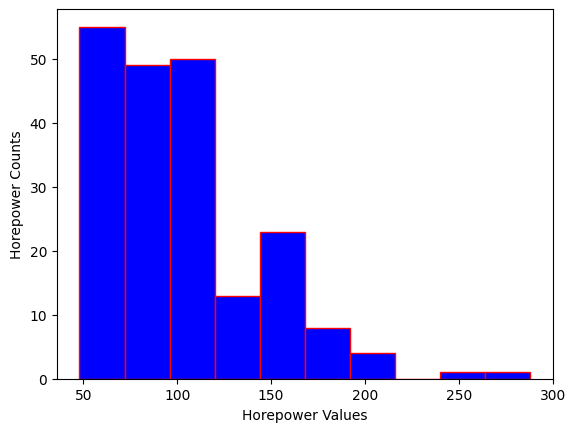

In [7]:
plt.hist(df['horsepower'],color='b',edgecolor='r')
plt.xlabel("Horepower Values")
plt.ylabel("Horepower Counts")
plt.show()

In [8]:
bins=np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)

In [9]:
bins

array([ 48., 128., 208., 288.])

In [11]:
groups_names=['low','mid','high']
df['horsepower_bins']=pd.cut(df['horsepower'],bins,labels=groups_names,include_lowest=True)
df[['horsepower','horsepower_bins']]

,horsepower,horsepower_bins
0,111.0,low
1,154.0,mid
2,102.0,low
3,115.0,low
4,110.0,low
...,...,...
199,114.0,low
200,160.0,mid
201,134.0,mid
202,106.0,low


In [12]:
df['horespower_bins'].value_counts()

low     162
mid      40
high      2
Name: horespower_bins, dtype: int64

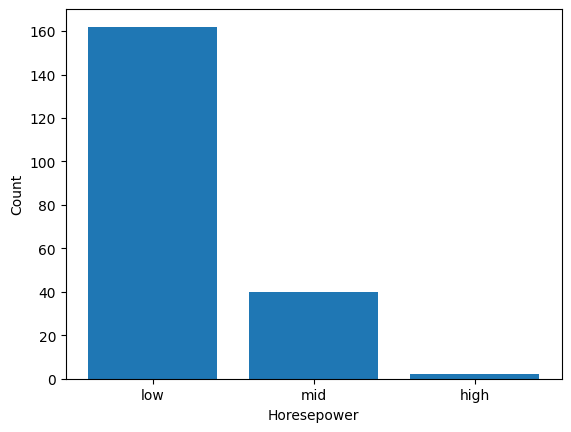

In [16]:
plt.bar(groups_names,df['horespower_bins'].value_counts())
plt.xlabel("Horesepower")
plt.ylabel("Count")
plt.show()

In [17]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'symboling', 'normalized-losses', 'make',
       'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'horespower_bins',
       'horsepower_bins'],
      dtype='object')

In [18]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64

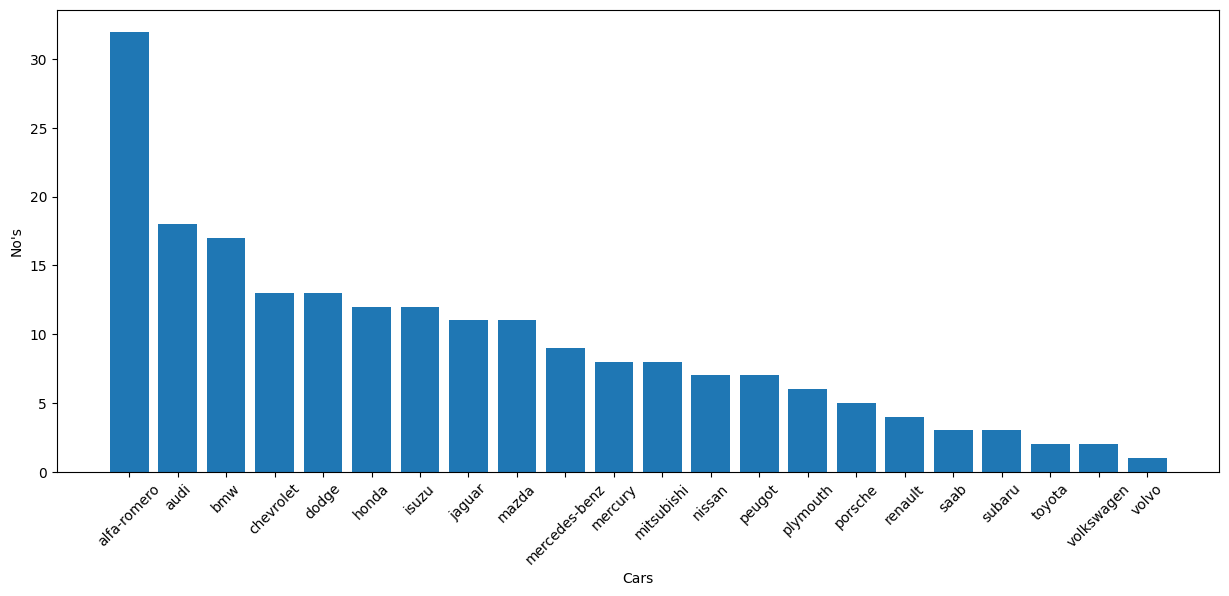

In [26]:
plt.figure(figsize=(15,6))
plt.bar(df['make'].unique(),df['make'].value_counts())
plt.xlabel("Cars")
plt.ylabel("No's")
plt.xticks(rotation=45)
plt.show()

In [39]:
max_horsepower_by_make = df.groupby('make')['horsepower'].max()
print(max_horsepower_by_make)


make
alfa-romero      154.000000
audi             160.000000
bmw              182.000000
chevrolet         70.000000
dodge            145.000000
honda            101.000000
isuzu             90.000000
jaguar           262.000000
mazda            135.000000
mercedes-benz    184.000000
mercury          175.000000
mitsubishi       145.000000
nissan           200.000000
peugot           142.000000
plymouth         145.000000
porsche          288.000000
renault          104.222772
saab             160.000000
subaru           111.000000
toyota           161.000000
volkswagen       110.000000
volvo            162.000000
Name: horsepower, dtype: float64


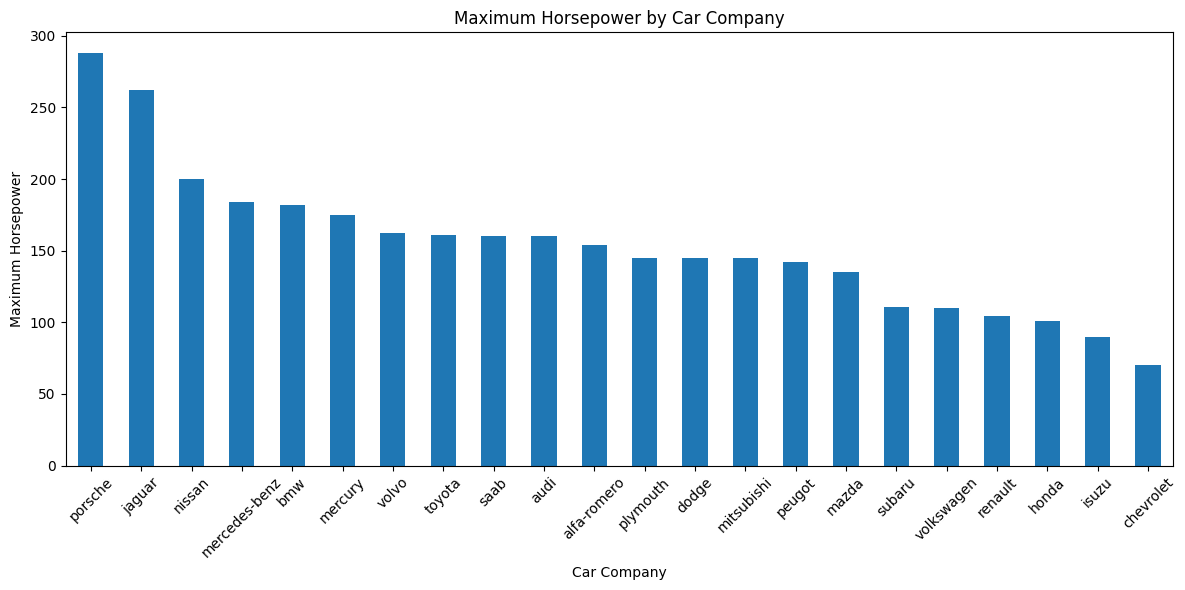

In [41]:
sorted_max_horsepower = max_horsepower_by_make.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sorted_max_horsepower.plot(kind='bar')
plt.xlabel('Car Company')
plt.ylabel('Maximum Horsepower')
plt.title('Maximum Horsepower by Car Company')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()